In [1]:
import pandas as pd
import numpy as np

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, median_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split

from catboost import CatBoostRegressor

from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline

In [2]:
def result_pred(pred, resY):
    print(f'mean_squared_error: {math.sqrt(mean_squared_error(resY, pred))}')
    print(f'mean_absolute_error: {mean_absolute_error(resY, pred)}')
    print(f'median_absolute_error: {median_absolute_error(resY, pred)}')
    print(f'mean_absolute_percentage_error: {mean_absolute_percentage_error(resY, pred)}')
    print(f'r2_score: {r2_score(resY, pred)}')

# Скачивание датасета и его анализ

In [3]:
data = pd.read_csv('train.tsv', sep='\t')

In [4]:
data

,id,name,employer_name,experience_name,schedule_name,key_skills_name,accept_handicapped,accept_kids,unified_address_city,unified_address_state,...,raw_branded_description,lemmaized_wo_stopwords_raw_description,lemmaized_wo_stopwords_raw_branded_description,if_foreign_language,is_branded_description,name_clean,employment_name,employer_id,employer_industries,salary_mean_net
0,49242400,Инженер группы технической поддержки,DatsTeam,От 1 года до 3 лет,Сменный график,не указано,False,False,Москва,Москва,...,NaN,разрабатывать рекламный система оплата действи...,NaN,Не указано,заполнено,инженер группа технический поддержка,Полная занятость,4437201.0,не указано,80000.00
1,49496801,Специалист группы кадрового администрирования,Почта России,Нет опыта,Полный день,оформление трудовых книжек,False,False,Абакан,Республика Хакасия,...,АО «Почта России» входит в перечень системообр...,обязанность ведение кадровый делопроизводство ...,ао почта россия входить перечень системообразу...,Не указано,не заполнено,специалист группа кадровый администрирование,Полная занятость,4352.0,почтовая доставка,19989.12
2,44198403,Оператор 1С,Стройгарантсервис,От 1 года до 3 лет,Полный день,первичные документы,False,False,Москва,Москва,...,NaN,условие график работа 5/2 09.00 18.00;• оформл...,NaN,Не указано,заполнено,оператор 1с,Полная занятость,1794943.0,лифты,45000.00
3,47707600,Инженер ПТО,Коммунальник,От 3 до 6 лет,Полный день,autocad,False,False,NaN,Краснодарский край,...,NaN,строительный инженерный компания коммунальник ...,NaN,Не указано,заполнено,инженер пто,Полная занятость,1881241.0,не указано,40000.00
4,44610002,Водитель в войсковую часть (пункт отбора на во...,Пункт отбора на военную службу по контракту по...,Нет опыта,Полный день,водительское удостоверение категории bc,False,False,NaN,Калужская область,...,NaN,обязанность знать устройство правило эксплуата...,NaN,Не указано,заполнено,водитель войсковой часть пункт отбор военный с...,Полная занятость,1586217.0,не указано,37500.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61309,49132201,Инженер ОТК,РГМ-Нефть-Газ-Сервис,От 1 года до 3 лет,Полный день,не указано,False,False,Воронеж,Воронежская область,...,NaN,обязанность контроль сварка вика контроль дета...,NaN,Не указано,заполнено,инженер отк,Полная занятость,1089764.0,не указано,30450.00
61310,41386400,Врач-эндокринолог (г. Геленджик),ГКУ КК ЦЗН города Геленджик,Нет опыта,Полный день,не указано,False,False,NaN,Калининградская область,...,NaN,обязанность выполнять перечень работа услуга д...,NaN,Не указано,заполнено,врач эндокринолог г. геленджик,Полная занятость,4481442.0,не указано,30450.00
61311,43351202,Швея-портной,Дом Быта,От 3 до 6 лет,Полный день,работа с клиентами,False,False,Москва,Москва,...,NaN,обязанность ремонт реставрация одежда перекрой...,NaN,Не указано,заполнено,швея портной,Полная занятость,4159812.0,не указано,60000.00
61312,44745603,Специалист помощи пользователям Яндекс.Учебника,Яндекс Крауд,Нет опыта,Удаленная работа,не указано,True,False,Пушкино,Московская область,...,NaN,день сервис яндекс пользоваться миллион челове...,NaN,Не указано,заполнено,специалист помощь пользователь яндекс учебник,Частичная занятость,9498112.0,не указано,13000.00


## Убираем не нужные колонки

In [5]:
data = data.drop(columns=['id', 'raw_branded_description',
                          'lemmaized_wo_stopwords_raw_branded_description',
                          'employer_id', 'accept_handicapped', 'accept_kids',
                          'raw_description', 'name_clean'])

In [6]:
data

,name,employer_name,experience_name,schedule_name,key_skills_name,unified_address_city,unified_address_state,unified_address_region,unified_address_country,specializations_profarea_name,professional_roles_name,languages_name,lemmaized_wo_stopwords_raw_description,if_foreign_language,is_branded_description,employment_name,employer_industries,salary_mean_net
0,Инженер группы технической поддержки,DatsTeam,От 1 года до 3 лет,Сменный график,не указано,Москва,Москва,Центральный федеральный округ,Россия,информационные технологии,специалист технической поддержки,[],разрабатывать рекламный система оплата действи...,Не указано,заполнено,Полная занятость,не указано,80000.00
1,Специалист группы кадрового администрирования,Почта России,Нет опыта,Полный день,оформление трудовых книжек,Абакан,Республика Хакасия,Сибирский федеральный округ,Россия,не указано,специалист по кадрам,[],обязанность ведение кадровый делопроизводство ...,Не указано,не заполнено,Полная занятость,почтовая доставка,19989.12
2,Оператор 1С,Стройгарантсервис,От 1 года до 3 лет,Полный день,первичные документы,Москва,Москва,Центральный федеральный округ,Россия,не указано,оператор базы данных,[],условие график работа 5/2 09.00 18.00;• оформл...,Не указано,заполнено,Полная занятость,лифты,45000.00
3,Инженер ПТО,Коммунальник,От 3 до 6 лет,Полный день,autocad,NaN,Краснодарский край,Южный федеральный округ,Россия,строительство,инженер-проектировщик,[],строительный инженерный компания коммунальник ...,Не указано,заполнено,Полная занятость,не указано,40000.00
4,Водитель в войсковую часть (пункт отбора на во...,Пункт отбора на военную службу по контракту по...,Нет опыта,Полный день,водительское удостоверение категории bc,NaN,Калужская область,Центральный федеральный округ,Россия,не указано,водитель,[],обязанность знать устройство правило эксплуата...,Не указано,заполнено,Полная занятость,не указано,37500.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61309,Инженер ОТК,РГМ-Нефть-Газ-Сервис,От 1 года до 3 лет,Полный день,не указано,Воронеж,Воронежская область,Центральный федеральный округ,Россия,не указано,технолог,[],обязанность контроль сварка вика контроль дета...,Не указано,заполнено,Полная занятость,не указано,30450.00
61310,Врач-эндокринолог (г. Геленджик),ГКУ КК ЦЗН города Геленджик,Нет опыта,Полный день,не указано,NaN,Калининградская область,Северо-Западный федеральный округ,Россия,медицина,врач,[],обязанность выполнять перечень работа услуга д...,Не указано,заполнено,Полная занятость,не указано,30450.00
61311,Швея-портной,Дом Быта,От 3 до 6 лет,Полный день,работа с клиентами,Москва,Москва,Центральный федеральный округ,Россия,не указано,закройщик,[],обязанность ремонт реставрация одежда перекрой...,Не указано,заполнено,Полная занятость,не указано,60000.00
61312,Специалист помощи пользователям Яндекс.Учебника,Яндекс Крауд,Нет опыта,Удаленная работа,не указано,Пушкино,Московская область,Центральный федеральный округ,Россия,не указано,другое,[],день сервис яндекс пользоваться миллион челове...,Не указано,заполнено,Частичная занятость,не указано,13000.00


## Смотрим на пустые значения

In [7]:
data.isnull().sum()

name                                          0
employer_name                                 0
experience_name                               0
schedule_name                                 0
key_skills_name                               0
unified_address_city                      14333
unified_address_state                         0
unified_address_region                        7
unified_address_country                       0
specializations_profarea_name                 0
professional_roles_name                       0
languages_name                                0
lemmaized_wo_stopwords_raw_description        0
if_foreign_language                           0
is_branded_description                        0
employment_name                               0
employer_industries                           0
salary_mean_net                               0
dtype: int64

### unified_address_city

У нас есть три по логике одинаковые переменные unified_address_city unified_address_state unified_address_region

In [8]:
data['unified_address_city'].value_counts()

unified_address_city
Москва                          10128
Санкт-Петербург                  4819
Екатеринбург                     1440
Нижний Новгород                  1141
Казань                           1134
                                ...  
городской округ Сарапул             3
Каспийск                            3
Севастополь                         1
Ачинск                              1
городской округ Новошахтинск        1
Name: count, Length: 208, dtype: int64

In [9]:
data['unified_address_state'].value_counts()

unified_address_state
Москва                          10269
Санкт-Петербург                  4911
Краснодарский край               4873
Московская область               4732
Свердловская область             2104
                                ...  
Еврейская автономная область       18
Республика Тыва                    15
Ингушетия                          11
Чукотский автономный округ          8
Ненецкий автономный округ           6
Name: count, Length: 84, dtype: int64

In [10]:
data['unified_address_region'].value_counts()

unified_address_region
Центральный федеральный округ          21441
Приволжский федеральный округ          10602
Южный федеральный округ                 7536
Северо-Западный федеральный округ       7532
Сибирский федеральный округ             6392
Уральский федеральный округ             5142
Дальневосточный федеральный округ       1914
Северо-Кавказский федеральный округ      748
Name: count, dtype: int64

Уберём unified_address_region и unified_address_city оставив один столбец в котором нет выбрасов и заодно он несёт всебе большую суть чем другие

In [11]:
data = data.drop(columns=['unified_address_city', 'unified_address_region'])

In [12]:
data

,name,employer_name,experience_name,schedule_name,key_skills_name,unified_address_state,unified_address_country,specializations_profarea_name,professional_roles_name,languages_name,lemmaized_wo_stopwords_raw_description,if_foreign_language,is_branded_description,employment_name,employer_industries,salary_mean_net
0,Инженер группы технической поддержки,DatsTeam,От 1 года до 3 лет,Сменный график,не указано,Москва,Россия,информационные технологии,специалист технической поддержки,[],разрабатывать рекламный система оплата действи...,Не указано,заполнено,Полная занятость,не указано,80000.00
1,Специалист группы кадрового администрирования,Почта России,Нет опыта,Полный день,оформление трудовых книжек,Республика Хакасия,Россия,не указано,специалист по кадрам,[],обязанность ведение кадровый делопроизводство ...,Не указано,не заполнено,Полная занятость,почтовая доставка,19989.12
2,Оператор 1С,Стройгарантсервис,От 1 года до 3 лет,Полный день,первичные документы,Москва,Россия,не указано,оператор базы данных,[],условие график работа 5/2 09.00 18.00;• оформл...,Не указано,заполнено,Полная занятость,лифты,45000.00
3,Инженер ПТО,Коммунальник,От 3 до 6 лет,Полный день,autocad,Краснодарский край,Россия,строительство,инженер-проектировщик,[],строительный инженерный компания коммунальник ...,Не указано,заполнено,Полная занятость,не указано,40000.00
4,Водитель в войсковую часть (пункт отбора на во...,Пункт отбора на военную службу по контракту по...,Нет опыта,Полный день,водительское удостоверение категории bc,Калужская область,Россия,не указано,водитель,[],обязанность знать устройство правило эксплуата...,Не указано,заполнено,Полная занятость,не указано,37500.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61309,Инженер ОТК,РГМ-Нефть-Газ-Сервис,От 1 года до 3 лет,Полный день,не указано,Воронежская область,Россия,не указано,технолог,[],обязанность контроль сварка вика контроль дета...,Не указано,заполнено,Полная занятость,не указано,30450.00
61310,Врач-эндокринолог (г. Геленджик),ГКУ КК ЦЗН города Геленджик,Нет опыта,Полный день,не указано,Калининградская область,Россия,медицина,врач,[],обязанность выполнять перечень работа услуга д...,Не указано,заполнено,Полная занятость,не указано,30450.00
61311,Швея-портной,Дом Быта,От 3 до 6 лет,Полный день,работа с клиентами,Москва,Россия,не указано,закройщик,[],обязанность ремонт реставрация одежда перекрой...,Не указано,заполнено,Полная занятость,не указано,60000.00
61312,Специалист помощи пользователям Яндекс.Учебника,Яндекс Крауд,Нет опыта,Удаленная работа,не указано,Московская область,Россия,не указано,другое,[],день сервис яндекс пользоваться миллион челове...,Не указано,заполнено,Частичная занятость,не указано,13000.00


## Анализ

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61314 entries, 0 to 61313
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   name                                    61314 non-null  object 
 1   employer_name                           61314 non-null  object 
 2   experience_name                         61314 non-null  object 
 3   schedule_name                           61314 non-null  object 
 4   key_skills_name                         61314 non-null  object 
 5   unified_address_state                   61314 non-null  object 
 6   unified_address_country                 61314 non-null  object 
 7   specializations_profarea_name           61314 non-null  object 
 8   professional_roles_name                 61314 non-null  object 
 9   languages_name                          61314 non-null  object 
 10  lemmaized_wo_stopwords_raw_description  61314 non-null  ob

In [14]:
data['name'].value_counts()

name
Менеджер по продажам                                                750
Продавец-консультант                                                655
Кладовщик                                                           456
Менеджер по работе с клиентами                                      411
Бухгалтер                                                           398
                                                                   ... 
Водитель автомобиля 4 разряда (служба механизации и транспорта)       1
Региональный менеджер по подбору и адаптации линейного персонала      1
Официант в ресторан на теплоход (м. Киевская)                         1
Ветеринарный врач-консультант (Энтузиастов, 31)                       1
Продавец линии раздачи                                                1
Name: count, Length: 29760, dtype: int64

In [15]:
data['employer_name'].value_counts()

employer_name
Пятёрочка                                        1244
МАГНИТ, Розничная сеть                            462
ГКУ КК Центр занятости населения города Анапа     459
Яндекс                                            444
Консалтинг Групп                                  422
                                                 ... 
ОЛиВа                                               1
Dataduck                                            1
Форпласт                                            1
Металлфорс                                          1
Дом Быта                                            1
Name: count, Length: 27647, dtype: int64

c:\Users\Egor\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Egor\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='schedule_name', ylabel='count'>

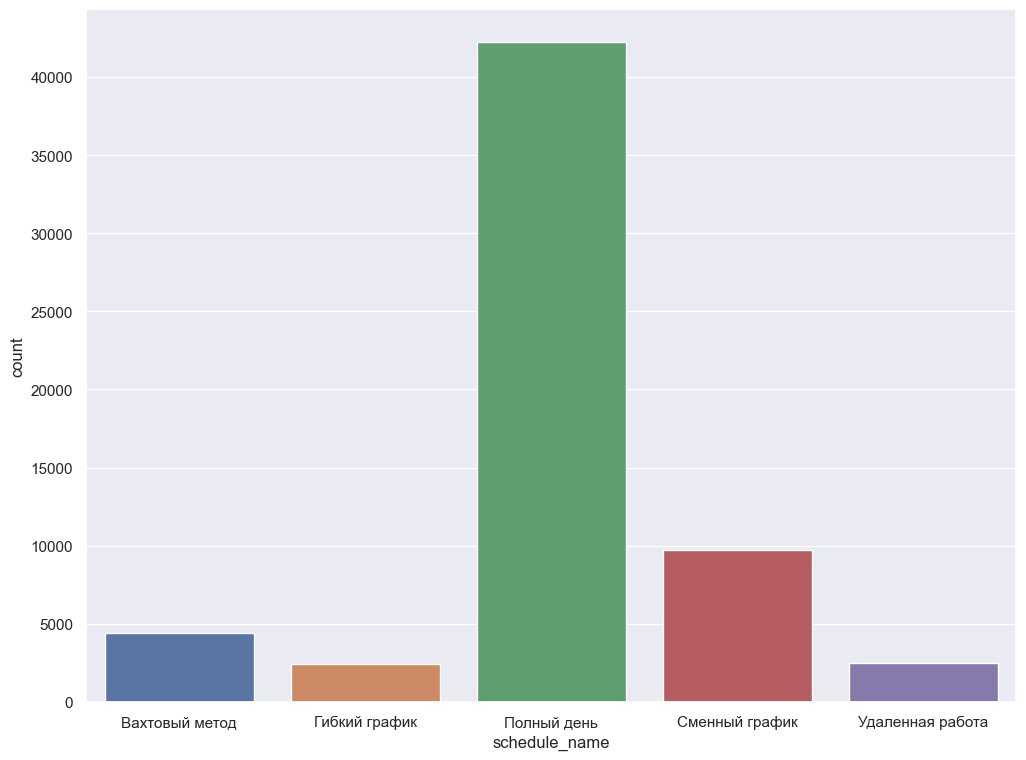

In [16]:
sns.set(rc={'figure.figsize':(12, 9)})
sns.countplot(data=data, x='schedule_name', order=data['schedule_name'].value_counts().index.sort_values())

c:\Users\Egor\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Egor\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='experience_name', ylabel='count'>

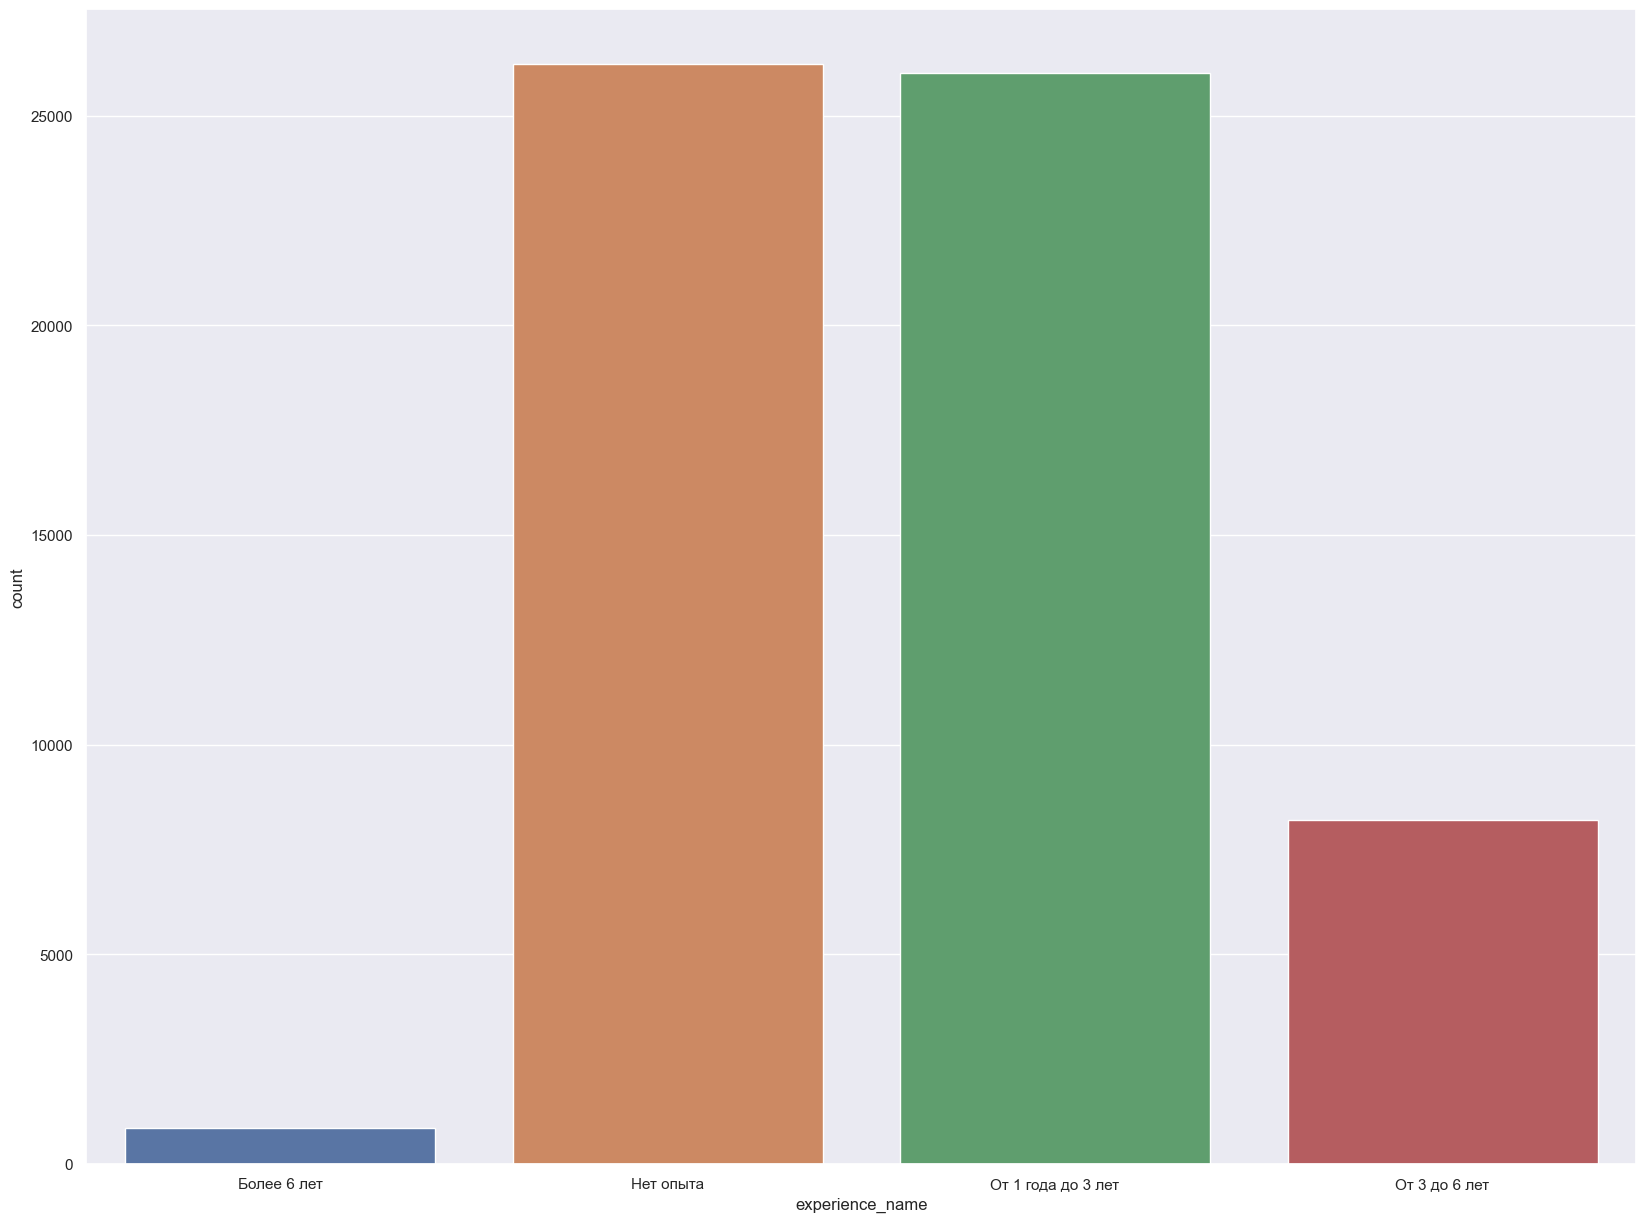

In [17]:
sns.set(rc={'figure.figsize':(20, 15)})
sns.countplot(data=data, x='experience_name', order=data['experience_name'].value_counts().index.sort_values())

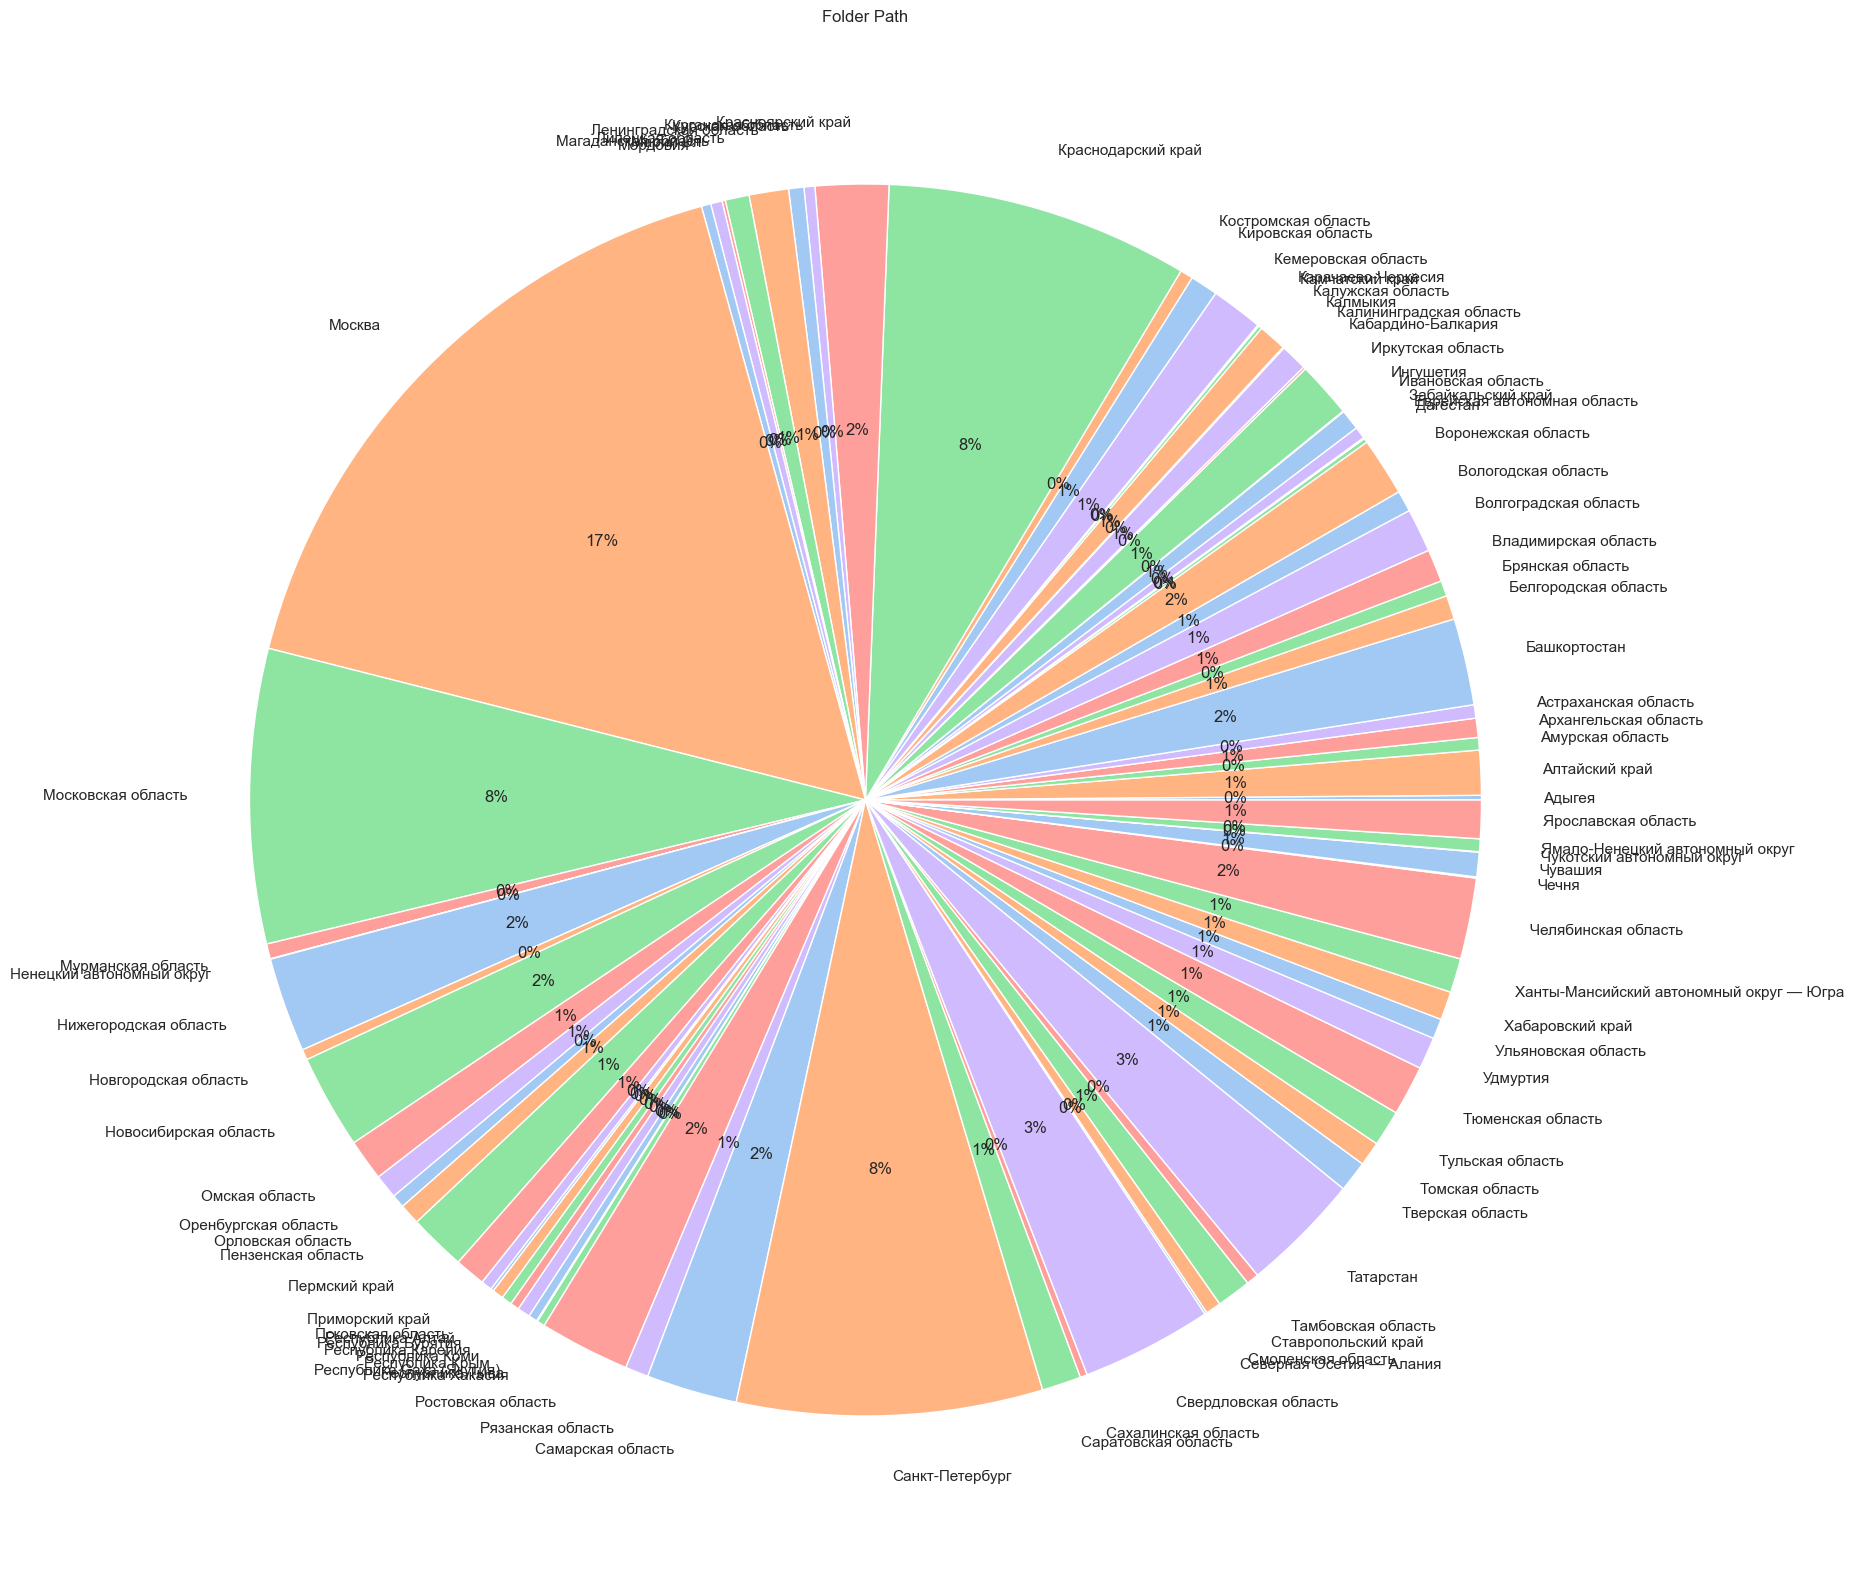

In [18]:
sns.set(rc={'figure.figsize': (20, 20)})
colors = sns.color_palette('pastel')[0:5]
labels = sorted(data['unified_address_state'].unique())
dt = np.array([len(data[data['unified_address_state'] == i])for i in labels])
plt.pie(dt, labels=labels, colors=colors, autopct='%.0f%%')
plt.title('Folder Path')
plt.show()

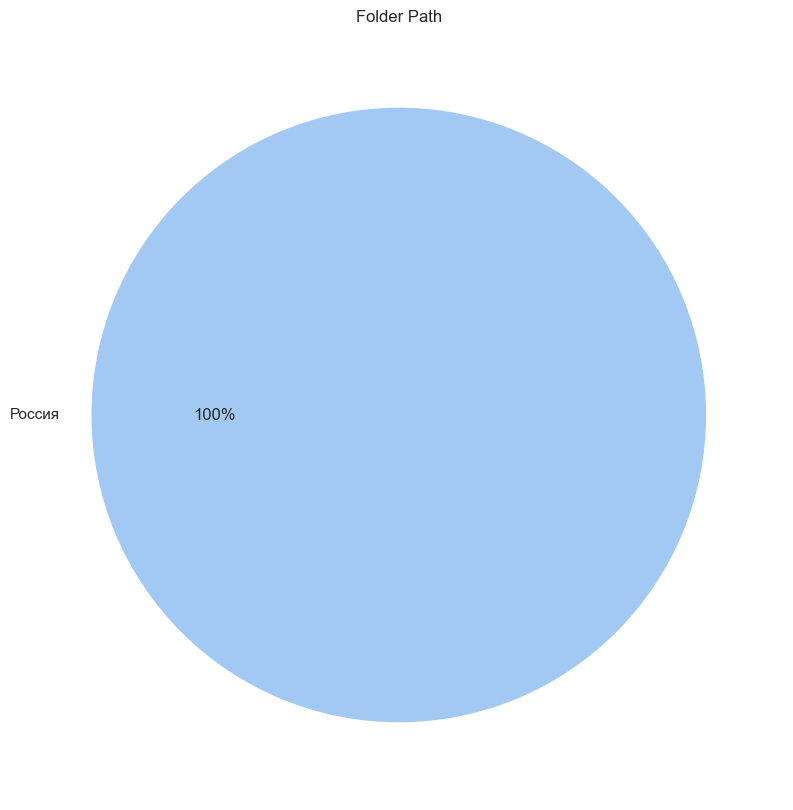

In [19]:
sns.set(rc={'figure.figsize': (10, 10)})
colors = sns.color_palette('pastel')[0:5]
labels = sorted(data['unified_address_country'].unique())
dt = np.array([len(data[data['unified_address_country'] == i])for i in labels])
plt.pie(dt, labels=labels, colors=colors, autopct='%.0f%%')
plt.title('Folder Path')
plt.show()

Столбец страны можно тоже удалить т.к. у нас всего один класс

In [20]:
data = data.drop(columns=['unified_address_country'])

c:\Users\Egor\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Egor\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='specializations_profarea_name', ylabel='count'>

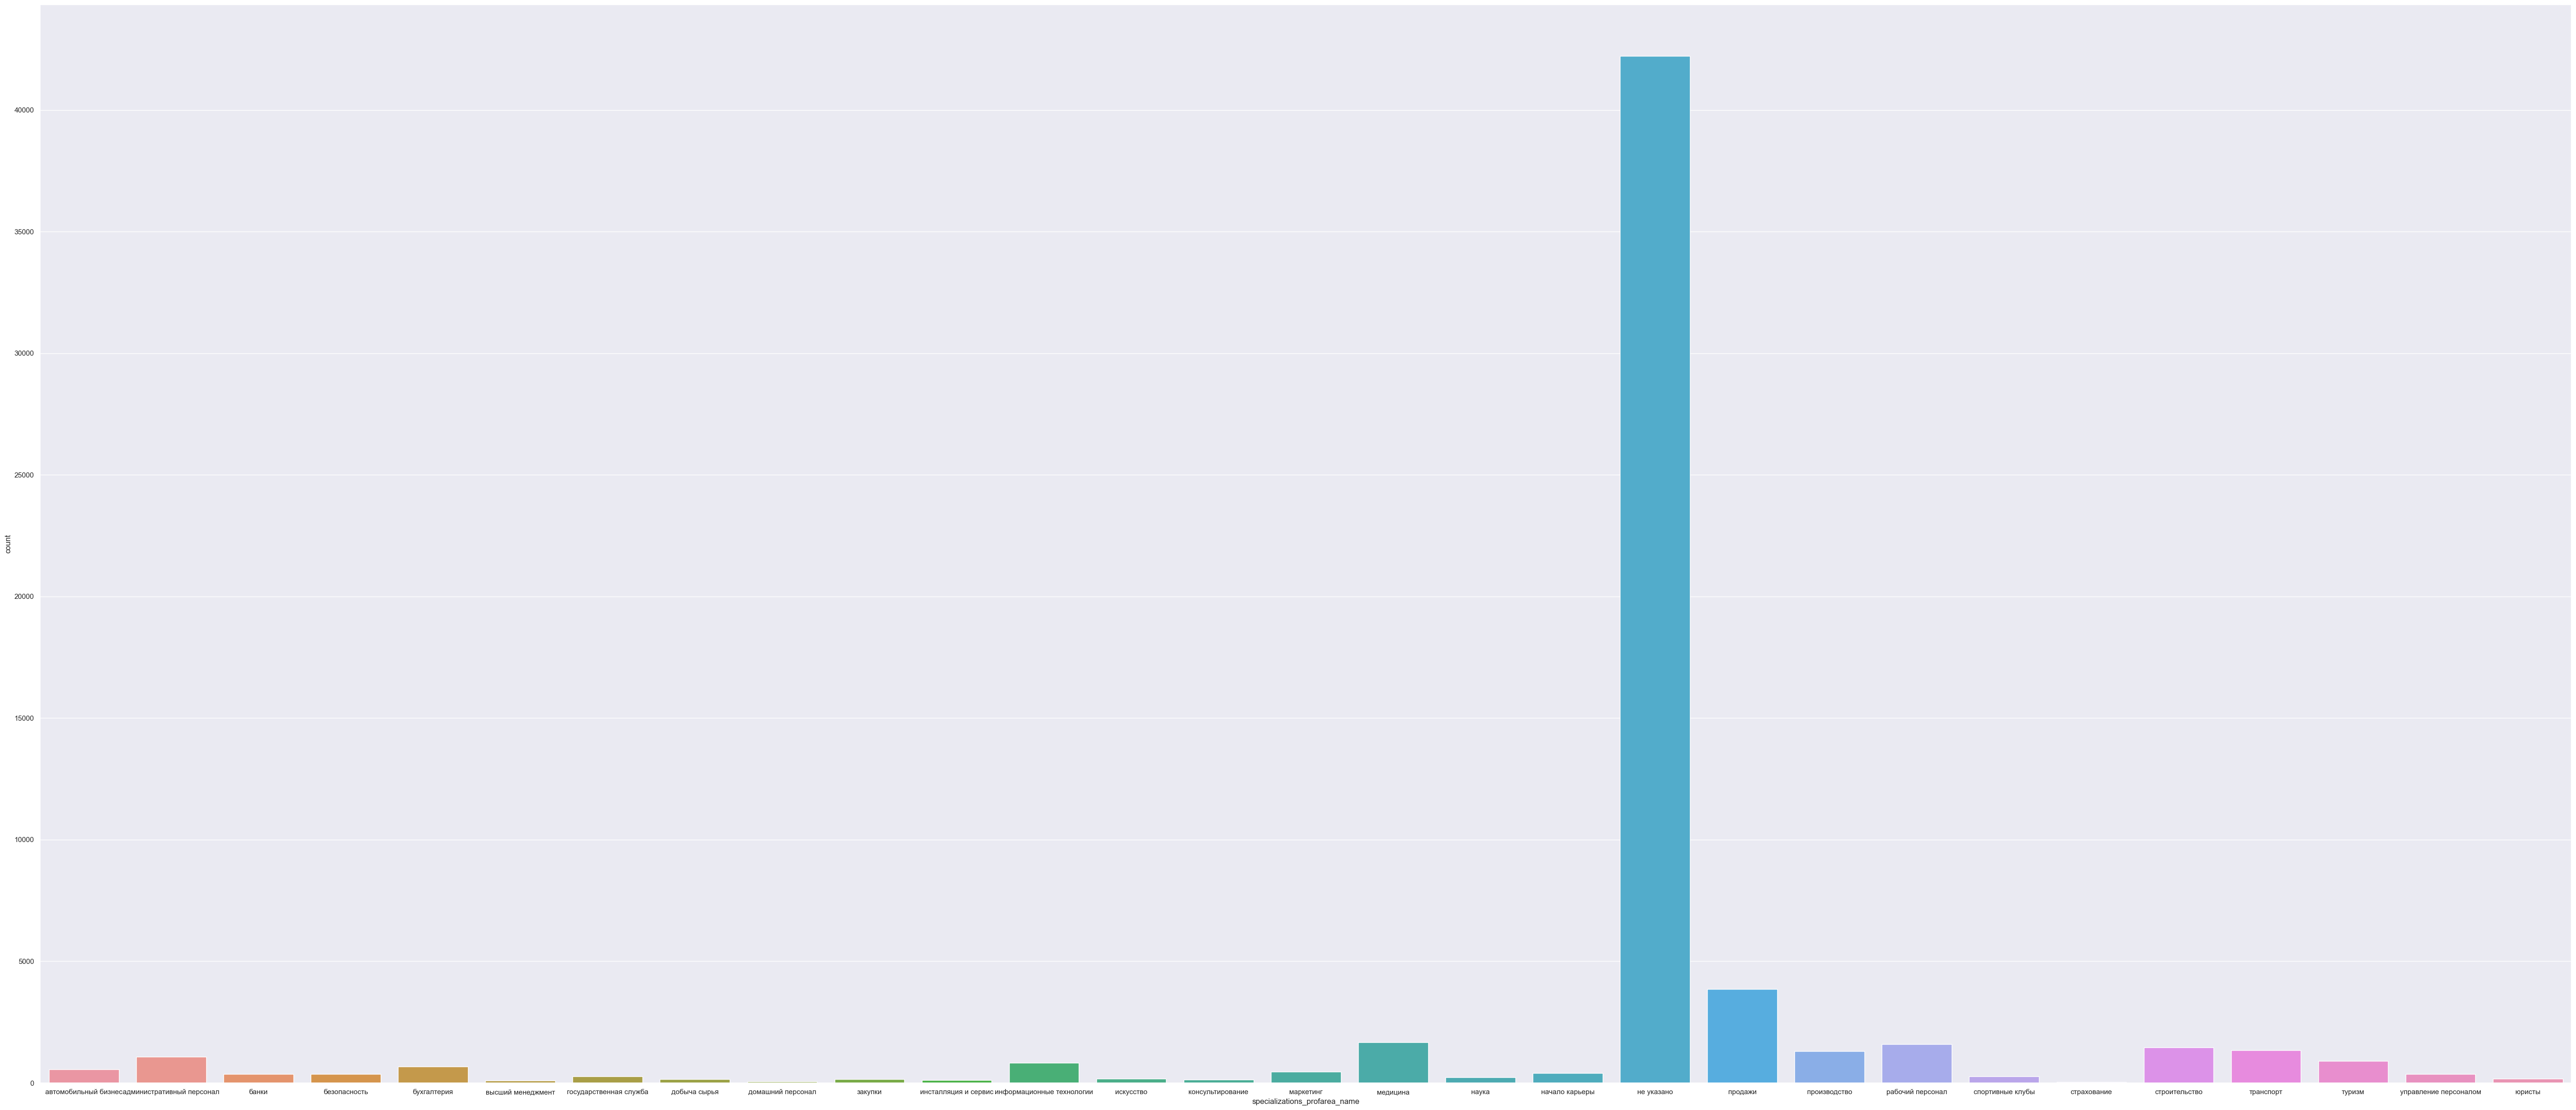

In [21]:
sns.set(rc={'figure.figsize':(70, 30)})
sns.countplot(data=data, x='specializations_profarea_name', order=data['specializations_profarea_name'].value_counts().index.sort_values())

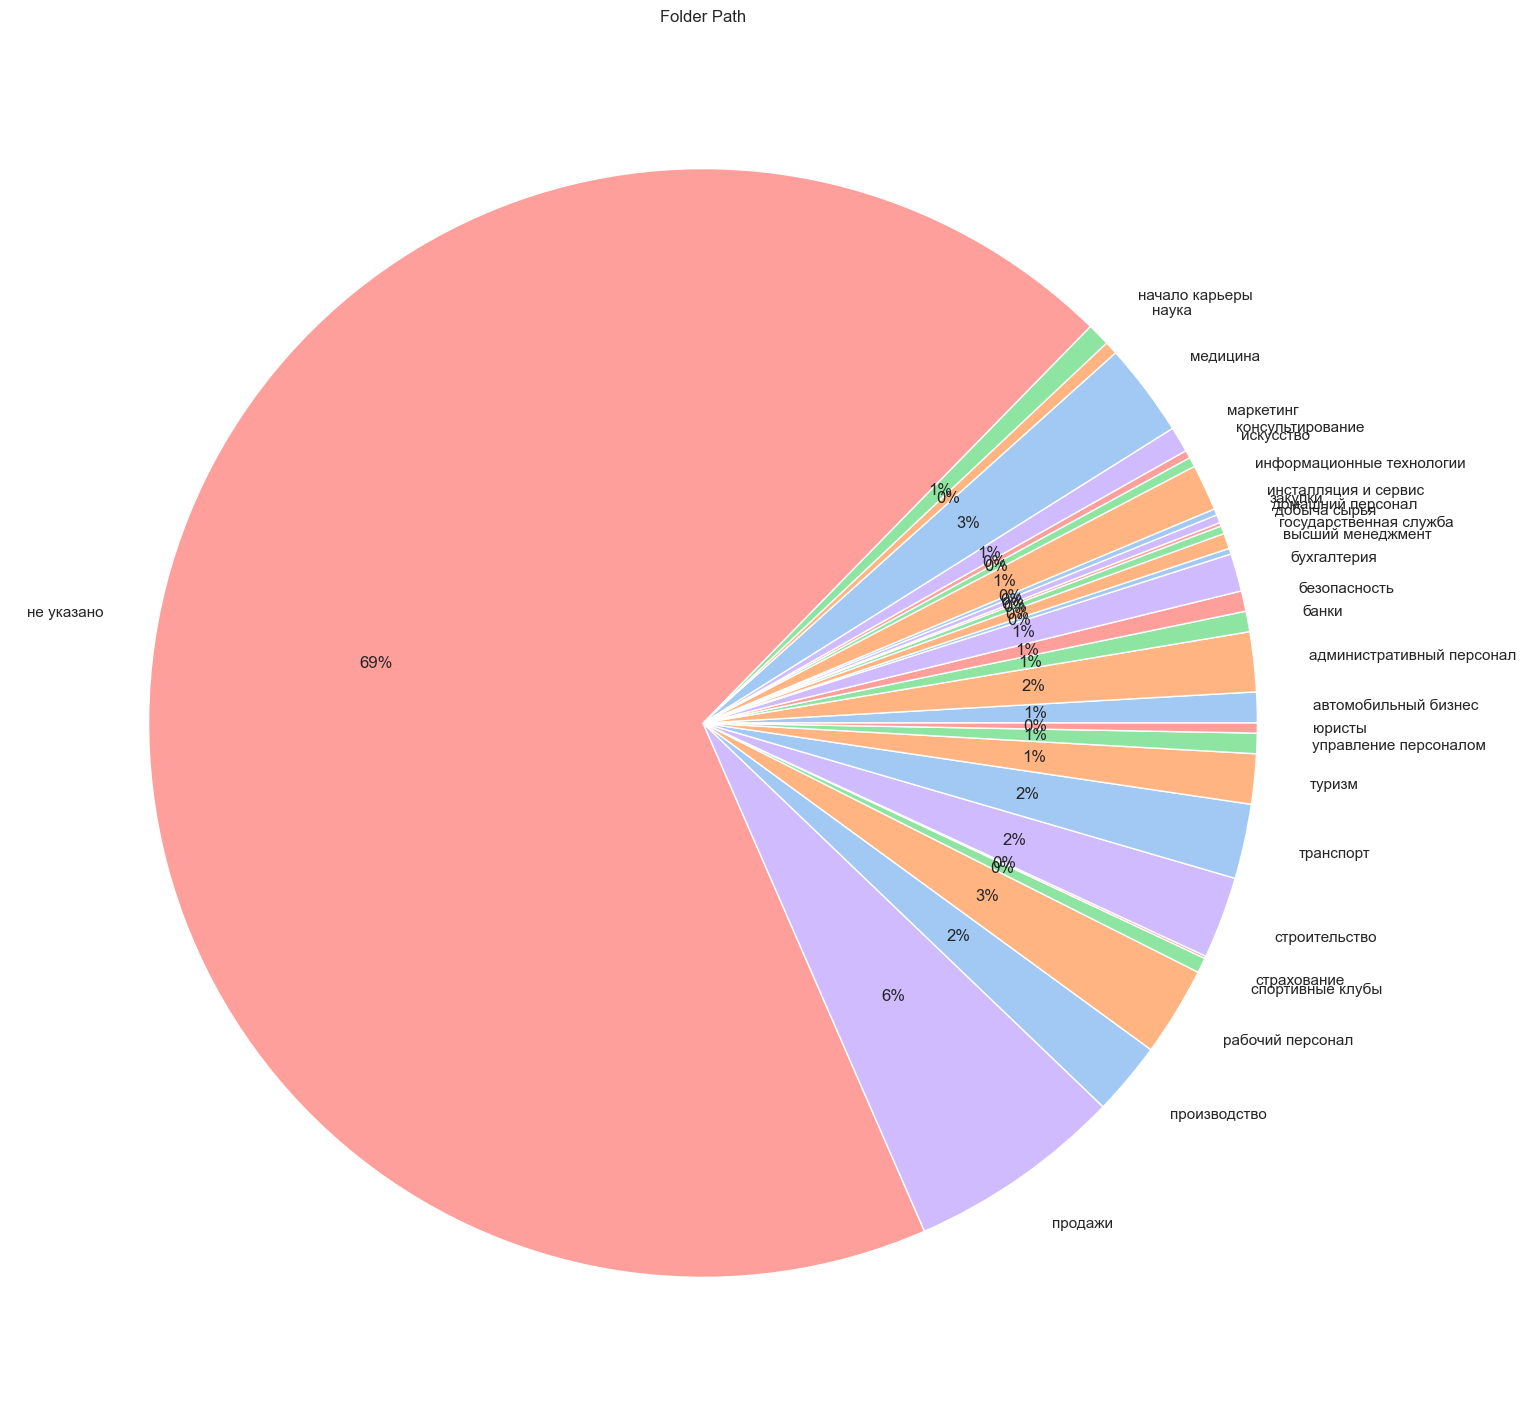

In [22]:
sns.set(rc={'figure.figsize': (18, 18)})
colors = sns.color_palette('pastel')[0:5]
labels = sorted(data['specializations_profarea_name'].unique())
dt = np.array([len(data[data['specializations_profarea_name'] == i])for i in labels])
plt.pie(dt, labels=labels, colors=colors, autopct='%.0f%%')
plt.title('Folder Path')
plt.show()

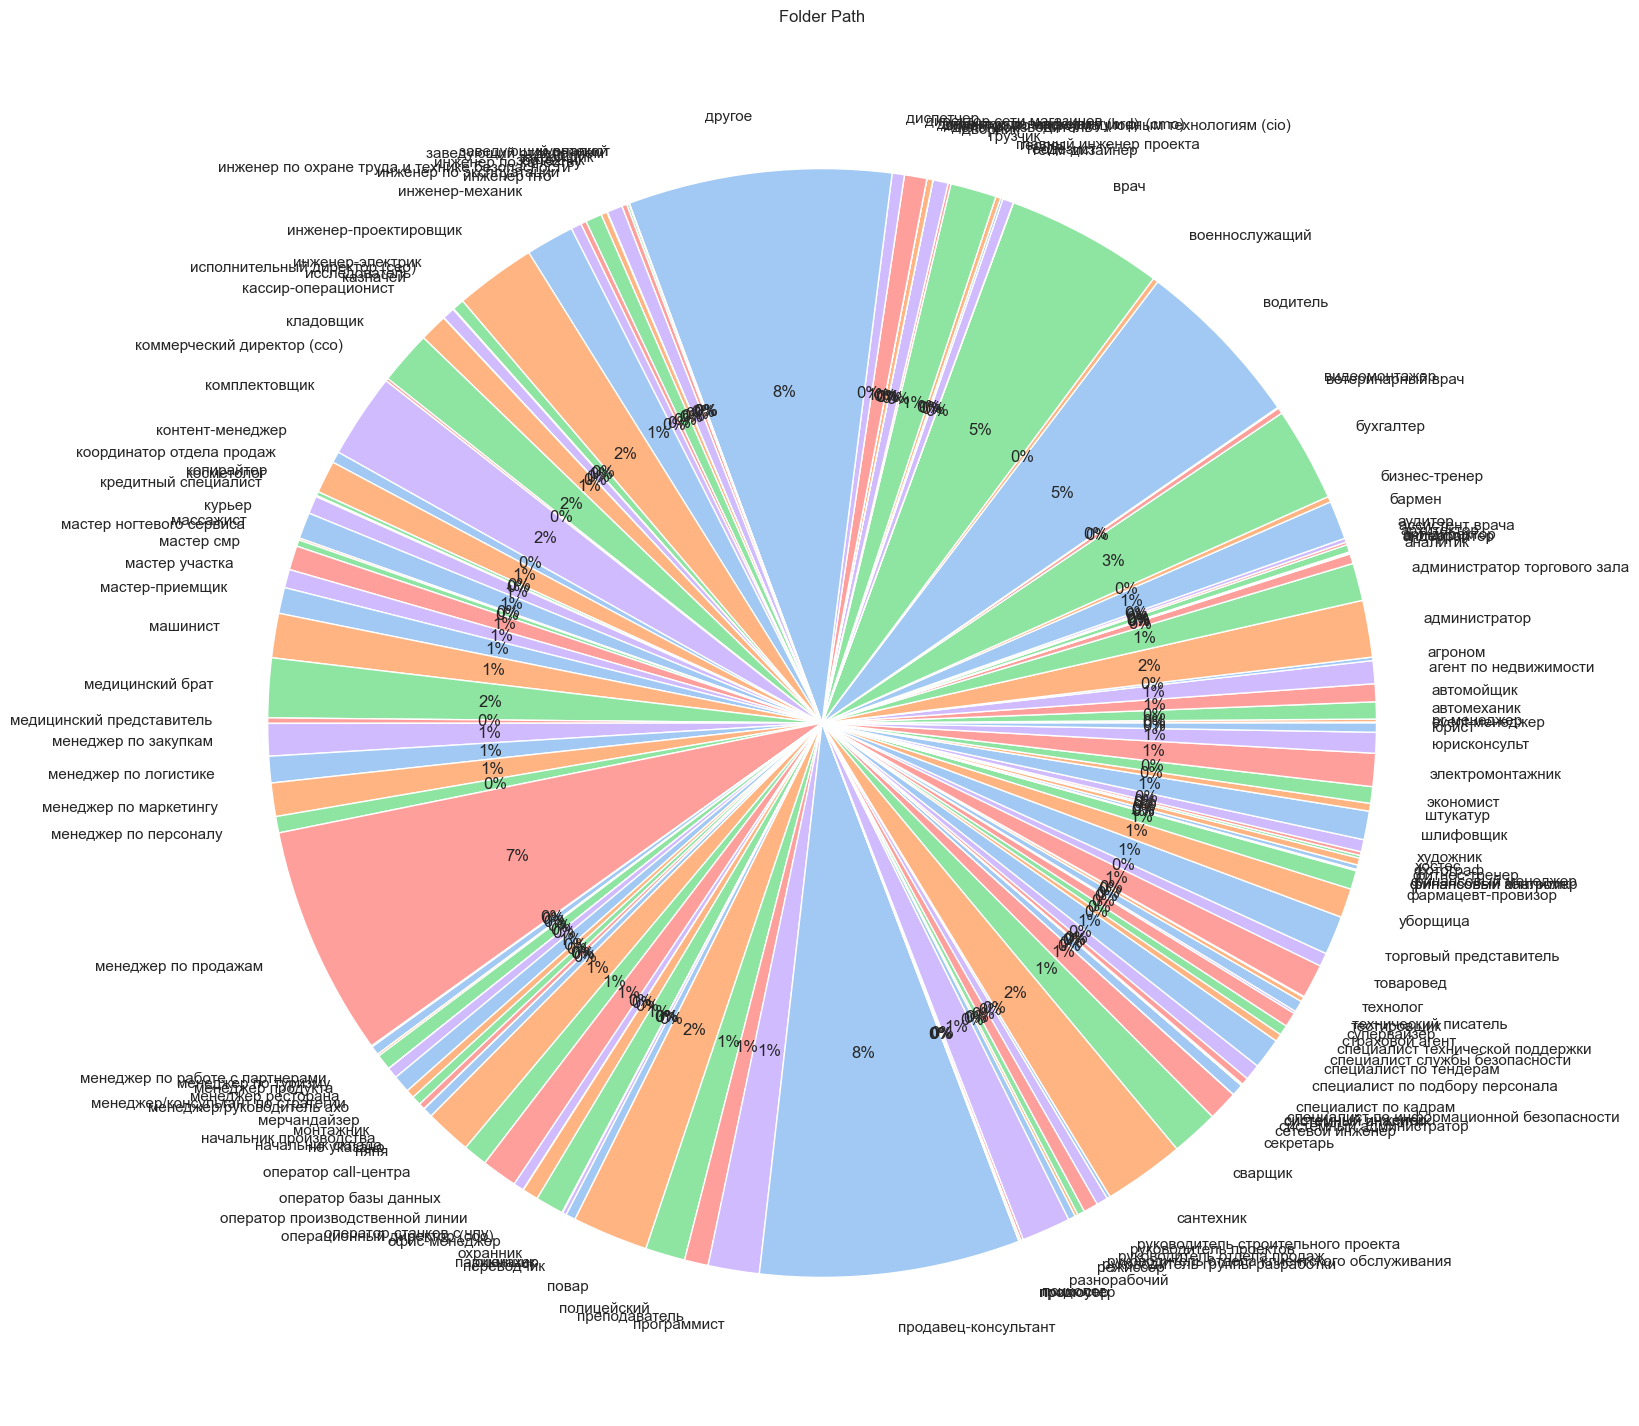

In [23]:
sns.set(rc={'figure.figsize': (18, 18)})
colors = sns.color_palette('pastel')[0:5]
labels = sorted(data['professional_roles_name'].unique())
dt = np.array([len(data[data['professional_roles_name'] == i])for i in labels])
plt.pie(dt, labels=labels, colors=colors, autopct='%.0f%%')
plt.title('Folder Path')
plt.show()

In [24]:
data['languages_name'].value_counts()

languages_name
[]                                                        59761
['Английский']                                             1334
['Русский']                                                  82
['Испанский']                                                11
['Английский', 'Испанский']                                  10
['Немецкий', 'Английский']                                   10
['Английский', 'Немецкий']                                    8
['Испанский', 'Английский']                                   8
['Французский']                                               7
['Итальянский']                                               7
['Немецкий']                                                  6
['Итальянский', 'Английский']                                 5
['Английский', 'Русский']                                     5
['Польский']                                                  5
['Японский']                                                  5
['Русский', 'Английский']

c:\Users\Egor\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Egor\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='if_foreign_language', ylabel='count'>

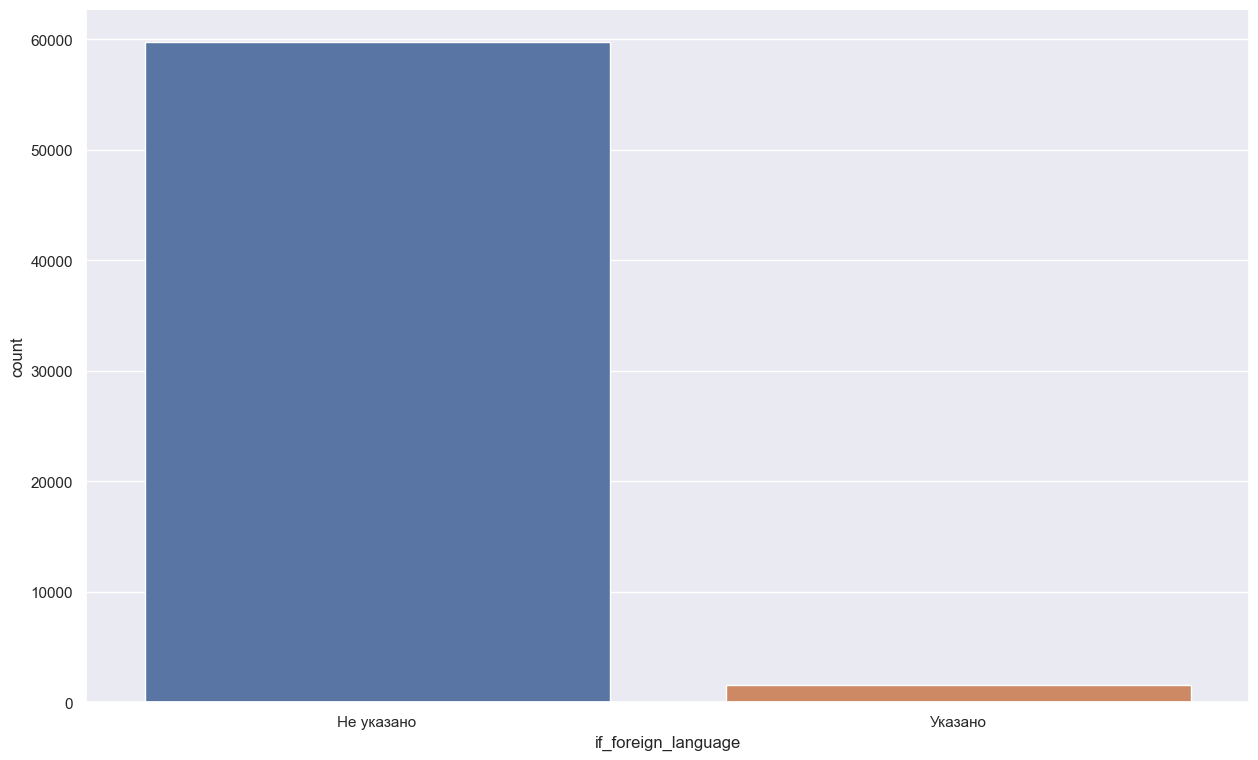

In [25]:
sns.set(rc={'figure.figsize':(15, 9)})
sns.countplot(data=data, x='if_foreign_language', order=data['if_foreign_language'].value_counts().index.sort_values())

c:\Users\Egor\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Egor\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='is_branded_description', ylabel='count'>

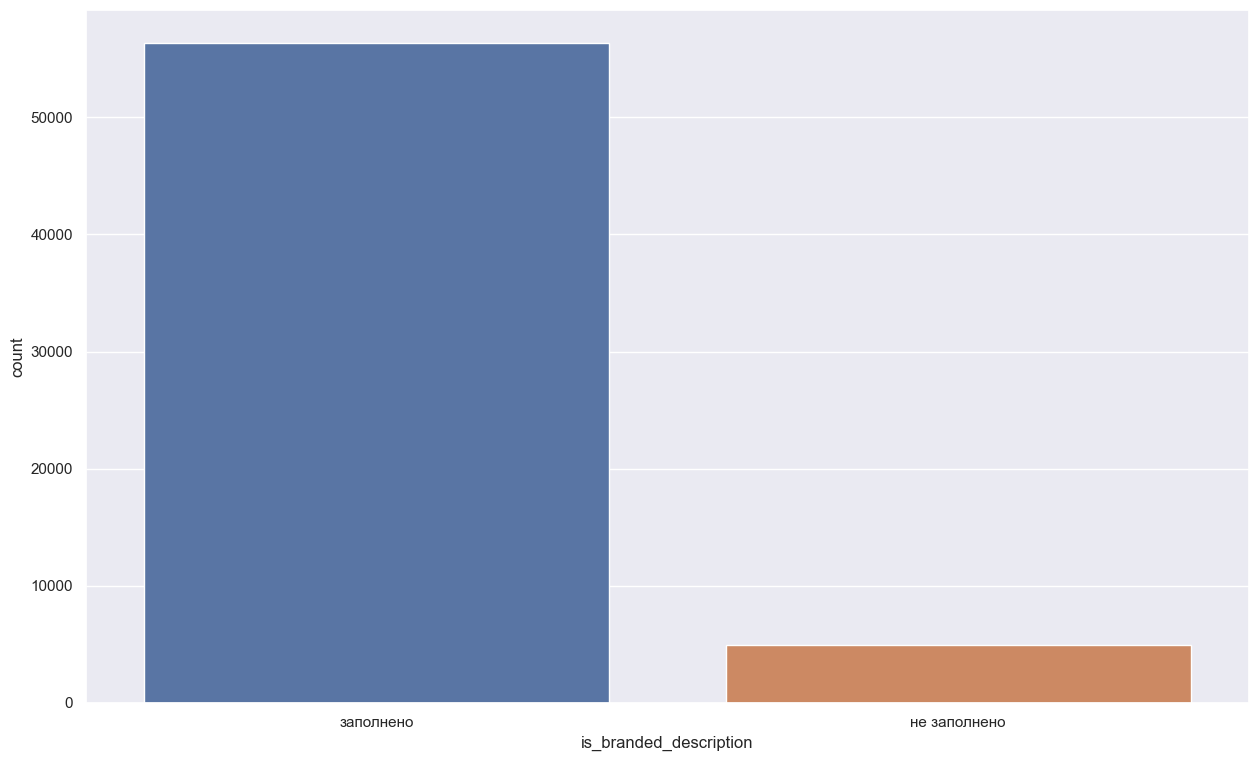

In [26]:
sns.set(rc={'figure.figsize':(15, 9)})
sns.countplot(data=data, x='is_branded_description', order=data['is_branded_description'].value_counts().index.sort_values())

c:\Users\Egor\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


c:\Users\Egor\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='employment_name', ylabel='count'>

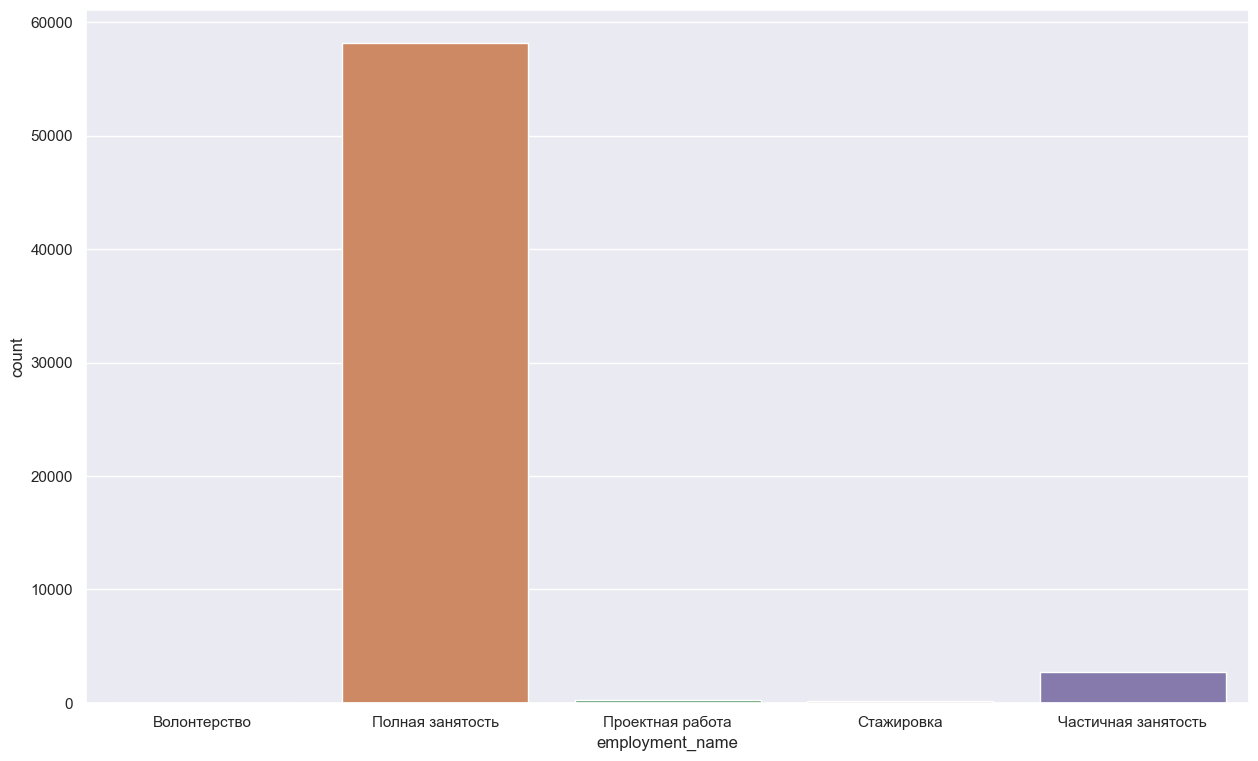

In [27]:
sns.set(rc={'figure.figsize':(15, 9)})
sns.countplot(data=data, x='employment_name', order=data['employment_name'].value_counts().index.sort_values())

# Преоброзование тестового датасета

In [28]:
testData = pd.read_csv('test.tsv', sep='\t')

In [29]:
testData = testData.drop(columns=['id', 'raw_branded_description',
                          'lemmaized_wo_stopwords_raw_branded_description',
                          'employer_id', 'accept_handicapped', 'accept_kids',
                          'raw_description', 'name_clean', 'unified_address_country', 'unified_address_city', 'unified_address_region'])

In [30]:
testData

,name,employer_name,experience_name,schedule_name,key_skills_name,unified_address_state,specializations_profarea_name,professional_roles_name,languages_name,lemmaized_wo_stopwords_raw_description,if_foreign_language,is_branded_description,employment_name,employer_industries
0,Продавец-консультант,билайн,Нет опыта,Полный день,активные продажи,Красноярский край,не указано,продавец-консультант,[],билайн международный компания работать 100 тыс...,Не указано,заполнено,Полная занятость,системная интеграция
1,Комплектовщик,GSR РАБОТА,Нет опыта,Полный день,контроль отгрузки и доставки товара,Нижегородская область,не указано,комплектовщик,[],крупный работодатель gsr работа приглашать раб...,Не указано,заполнено,Полная занятость,не указано
2,Барбер/Парикмахер мужской,Супермен (ИП Титов Кирилл Анатольевич),Нет опыта,Полный день,не указано,Самарская область,не указано,парикмахер,[],дело дружелюбный коллектив лояльный руководств...,Не указано,заполнено,Полная занятость,не указано
3,Контент-менеджер / ретушер / фотограф,Потапов Леонид Викторович,От 1 года до 3 лет,Полный день,грамотность,Москва,не указано,фотограф,[],оптовый интернет магазин optmoyo ru одежда обу...,Не указано,заполнено,Полная занятость,товары для дома
4,Сотрудник на пересчет товаров,Работут,Нет опыта,Сменный график,сканер,Московская область,рабочий персонал,другое,[],компания независимый инвентаризация ревизор по...,Не указано,заполнено,Частичная занятость,не указано
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26256,Электромонтер,А101-Комфорт,От 3 до 6 лет,Полный день,руководство коллективом,Москва,строительство,электромонтажник,[],обязанность обслуживание ремонт электроустанов...,Не указано,заполнено,Полная занятость,вентиляция и кондиционирование
26257,"Администратор регистратуры (Поликлиника № 6), ...",Областное бюджетное учреждение здравоохранения...,Нет опыта,Полный день,консультирование,Ивановская область,не указано,администратор,[],обязанность ​​​​​​- оформление медицинский док...,Не указано,заполнено,Полная занятость,не указано
26258,Ведущий юрист,Единый Центр,От 1 года до 3 лет,Полный день,арбитражные суды,Красноярский край,не указано,юрисконсульт,[],юридический служба единый центр защита компани...,Не указано,заполнено,Полная занятость,не указано
26259,"Кладовщик (м. Хорошёво, м. Беговая)",СИТИЛИНК,Нет опыта,Сменный график,проведение инвентаризаций,Москва,не указано,кладовщик,[],пожелание кандидат образование среднее опыт ра...,Не указано,заполнено,Полная занятость,бытовая техника


In [31]:
testData.isnull().sum()

name                                      0
employer_name                             0
experience_name                           0
schedule_name                             0
key_skills_name                           0
unified_address_state                     0
specializations_profarea_name             0
professional_roles_name                   0
languages_name                            0
lemmaized_wo_stopwords_raw_description    0
if_foreign_language                       0
is_branded_description                    0
employment_name                           0
employer_industries                       0
dtype: int64

# Преобразование и выделений фичей

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61314 entries, 0 to 61313
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   name                                    61314 non-null  object 
 1   employer_name                           61314 non-null  object 
 2   experience_name                         61314 non-null  object 
 3   schedule_name                           61314 non-null  object 
 4   key_skills_name                         61314 non-null  object 
 5   unified_address_state                   61314 non-null  object 
 6   specializations_profarea_name           61314 non-null  object 
 7   professional_roles_name                 61314 non-null  object 
 8   languages_name                          61314 non-null  object 
 9   lemmaized_wo_stopwords_raw_description  61314 non-null  object 
 10  if_foreign_language                     61314 non-null  ob

In [33]:
featuresCat = ['employer_name', 'experience_name', 'schedule_name',
               'key_skills_name', 'unified_address_state', 'professional_roles_name', 'languages_name',
               'employment_name', 'employer_industries']
featuresText = ['name', 'specializations_profarea_name', 'lemmaized_wo_stopwords_raw_description',
                'if_foreign_language', 'is_branded_description', ]

In [34]:
data = data.drop_duplicates()

In [35]:
import string


for i in tqdm(featuresText):
    if i != 'languages_name':
        data[i] = data[i].str.lower()
        for elem in string.punctuation:
            data[i] = data[i].map(lambda x: x.replace(elem, ''))
    else:
        data[i] = data[i].str.lower()
        for elem in ['[', ']', ',']:
            data[i] = data[i].map(lambda x: x.replace(elem, ''))
        data[i] = np.array(['null' if len(x) == 0 else x for x in data[i]])
for i in tqdm(featuresCat):
    data[i] = data[i].str.lower()
    for elem in string.punctuation:
        data[i] = data[i].map(lambda x: x.replace(elem, ''))
for i in tqdm(featuresText):
    testData[i] = testData[i].str.lower()
    for elem in string.punctuation:
        testData[i] = testData[i].map(lambda x: x.replace(elem, ''))
for i in tqdm(featuresCat):
    if i != 'languages_name':
        testData[i] = testData[i].str.lower()
        for elem in string.punctuation:
            testData[i] = testData[i].map(lambda x: x.replace(elem, ''))
    else:
        testData[i] = testData[i].str.lower()
        for elem in ['[', ']', ',']:
            testData[i] = testData[i].map(lambda x: x.replace(elem, ''))
        testData[i] = np.array(['null' if len(x) == 0 else x for x in testData[i]])


100%|██████████| 9/9 [00:01<00:00,  5.58it/s]


In [36]:
data['languages_name'] = np.array(['null' if len(x) == 0 else x for x in data['languages_name']])

In [37]:
data

,name,employer_name,experience_name,schedule_name,key_skills_name,unified_address_state,specializations_profarea_name,professional_roles_name,languages_name,lemmaized_wo_stopwords_raw_description,if_foreign_language,is_branded_description,employment_name,employer_industries,salary_mean_net
0,инженер группы технической поддержки,datsteam,от 1 года до 3 лет,сменный график,не указано,москва,информационные технологии,специалист технической поддержки,null,разрабатывать рекламный система оплата действи...,не указано,заполнено,полная занятость,не указано,80000.00
1,специалист группы кадрового администрирования,почта россии,нет опыта,полный день,оформление трудовых книжек,республика хакасия,не указано,специалист по кадрам,null,обязанность ведение кадровый делопроизводство ...,не указано,не заполнено,полная занятость,почтовая доставка,19989.12
2,оператор 1с,стройгарантсервис,от 1 года до 3 лет,полный день,первичные документы,москва,не указано,оператор базы данных,null,условие график работа 52 0900 1800• оформление...,не указано,заполнено,полная занятость,лифты,45000.00
3,инженер пто,коммунальник,от 3 до 6 лет,полный день,autocad,краснодарский край,строительство,инженерпроектировщик,null,строительный инженерный компания коммунальник ...,не указано,заполнено,полная занятость,не указано,40000.00
4,водитель в войсковую часть пункт отбора на вое...,пункт отбора на военную службу по контракту по...,нет опыта,полный день,водительское удостоверение категории bc,калужская область,не указано,водитель,null,обязанность знать устройство правило эксплуата...,не указано,заполнено,полная занятость,не указано,37500.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61309,инженер отк,ргмнефтьгазсервис,от 1 года до 3 лет,полный день,не указано,воронежская область,не указано,технолог,null,обязанность контроль сварка вика контроль дета...,не указано,заполнено,полная занятость,не указано,30450.00
61310,врачэндокринолог г геленджик,гку кк цзн города геленджик,нет опыта,полный день,не указано,калининградская область,медицина,врач,null,обязанность выполнять перечень работа услуга д...,не указано,заполнено,полная занятость,не указано,30450.00
61311,швеяпортной,дом быта,от 3 до 6 лет,полный день,работа с клиентами,москва,не указано,закройщик,null,обязанность ремонт реставрация одежда перекрой...,не указано,заполнено,полная занятость,не указано,60000.00
61312,специалист помощи пользователям яндексучебника,яндекс крауд,нет опыта,удаленная работа,не указано,московская область,не указано,другое,null,день сервис яндекс пользоваться миллион челове...,не указано,заполнено,частичная занятость,не указано,13000.00


In [38]:
testData

,name,employer_name,experience_name,schedule_name,key_skills_name,unified_address_state,specializations_profarea_name,professional_roles_name,languages_name,lemmaized_wo_stopwords_raw_description,if_foreign_language,is_branded_description,employment_name,employer_industries
0,продавецконсультант,билайн,нет опыта,полный день,активные продажи,красноярский край,не указано,продавецконсультант,null,билайн международный компания работать 100 тыс...,не указано,заполнено,полная занятость,системная интеграция
1,комплектовщик,gsr работа,нет опыта,полный день,контроль отгрузки и доставки товара,нижегородская область,не указано,комплектовщик,null,крупный работодатель gsr работа приглашать раб...,не указано,заполнено,полная занятость,не указано
2,барберпарикмахер мужской,супермен ип титов кирилл анатольевич,нет опыта,полный день,не указано,самарская область,не указано,парикмахер,null,дело дружелюбный коллектив лояльный руководств...,не указано,заполнено,полная занятость,не указано
3,контентменеджер ретушер фотограф,потапов леонид викторович,от 1 года до 3 лет,полный день,грамотность,москва,не указано,фотограф,null,оптовый интернет магазин optmoyo ru одежда обу...,не указано,заполнено,полная занятость,товары для дома
4,сотрудник на пересчет товаров,работут,нет опыта,сменный график,сканер,московская область,рабочий персонал,другое,null,компания независимый инвентаризация ревизор по...,не указано,заполнено,частичная занятость,не указано
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26256,электромонтер,а101комфорт,от 3 до 6 лет,полный день,руководство коллективом,москва,строительство,электромонтажник,null,обязанность обслуживание ремонт электроустанов...,не указано,заполнено,полная занятость,вентиляция и кондиционирование
26257,администратор регистратуры поликлиника № 6 г и...,областное бюджетное учреждение здравоохранения...,нет опыта,полный день,консультирование,ивановская область,не указано,администратор,null,обязанность ​​​​​​ оформление медицинский доку...,не указано,заполнено,полная занятость,не указано
26258,ведущий юрист,единый центр,от 1 года до 3 лет,полный день,арбитражные суды,красноярский край,не указано,юрисконсульт,null,юридический служба единый центр защита компани...,не указано,заполнено,полная занятость,не указано
26259,кладовщик м хорошёво м беговая,ситилинк,нет опыта,сменный график,проведение инвентаризаций,москва,не указано,кладовщик,null,пожелание кандидат образование среднее опыт ра...,не указано,заполнено,полная занятость,бытовая техника


In [39]:
X = data.drop(columns=['salary_mean_net'])
Y = data['salary_mean_net']

In [40]:
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size=0.1, random_state=42)

# Обучение модели

In [ ]:
catModel = CatBoostRegressor(
    iterations=60000,
    verbose=1000,
    task_type='GPU',
    use_best_model=True,
    learning_rate=0.007,
    l2_leaf_reg=0.07,
    grow_policy='Depthwise',
    depth=10,
    leaf_estimation_method='Newton',
    leaf_estimation_iterations=80
)

catModel.fit(X, Y, cat_features=featuresCat, text_features=featuresText,
            eval_set=(X_valid, Y_valid))

In [62]:
preds_val = catModel.predict(X_valid)

In [63]:
Y_valid

16526     38500.0
14973     37500.0
33888     55000.0
24264     70000.0
35692    110000.0
           ...   
11471     26100.0
28715     52200.0
46492     85000.0
37891     41000.0
36756     28449.0
Name: salary_mean_net, Length: 5935, dtype: float64

In [64]:
preds_val

array([32948.95895551, 34844.49659227, 59125.01563946, ...,
       83144.73996218, 39684.68169488, 32174.71967394])

In [66]:
result_pred(preds_val, Y_valid)

mean_squared_error: 2927.9572933631925
mean_absolute_error: 2022.6397305412859
median_absolute_error: 1463.4795347609324
mean_absolute_percentage_error: 0.046841249307242934
r2_score: 0.9899719946794587


c:\Users\Egor\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Egor\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\Egor\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Egor\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

# Предсказание теста

In [67]:
test_pred = catModel.predict(testData)

In [68]:
testData.shape

(26261, 14)

In [69]:
test_pred.shape

(26261,)

In [70]:
id_seria = pd.read_csv('test.tsv', sep='\t')['id']

In [71]:
sampleSub = pd.read_csv('sample_submission.tsv', sep='\t')

In [72]:
sampleSub

,id,salary_mean_net
0,45165602,77508
1,47291202,409890
2,44208002,162591
3,43765603,179264
4,49313000,482511
...,...,...
26256,46590400,215652
26257,46325401,161307
26258,47007802,473634
26259,46950802,226866


In [73]:
sampleSub['id'] = id_seria
sampleSub['salary_mean_net'] = test_pred

In [74]:
sampleSub

,id,salary_mean_net
0,45165602,36321.057493
1,47291202,32726.388228
2,44208002,36631.723215
3,43765603,45092.686174
4,49313000,30548.656056
...,...,...
26256,46590400,46457.608320
26257,46325401,22731.604737
26258,47007802,57073.383873
26259,46950802,43190.048773


In [75]:
sampleSub.to_csv('res15.tsv', index=False, sep='\t')

In [76]:
pd.read_csv('res14.tsv', sep='\t')

,id,salary_mean_net
0,45165602,36078.426135
1,47291202,31665.714909
2,44208002,36434.541788
3,43765603,46036.638559
4,49313000,29868.502058
...,...,...
26256,46590400,48169.029397
26257,46325401,22105.462454
26258,47007802,54251.363301
26259,46950802,42622.823970
